# Programming Exercise 8: Anomaly Detection and Recommender Systems
# 1 Anomaly detection

In [1]:
import scipy.io

data = scipy.io.loadmat('../matlab/ex8data1.mat')
print data.keys()

['yval', '__header__', '__globals__', 'Xval', 'X', '__version__']


In [2]:
X = data['X']
Xval = data['Xval']
yval = data['yval']
print X.shape, Xval.shape, yval.shape

(307, 2) (307, 2) (307, 1)


In [3]:
yval = yval[:, 0]

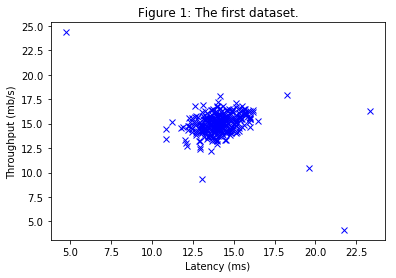

In [4]:
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

plt.plot(X[:,0], X[:,1], 'bx')
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.title('Figure 1: The first dataset.')

## 1.1 Gaussian distribution
$p(x; \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp(-\frac{(x-\mu)^2}{2\sigma^2})$

## 1.2 Estimating parameters for a Gaussian
$\mu_i = \frac{1}{m} \sum_{j=1}^{m} x_i^{(j)}$

$\sigma_i^2 = \frac{1}{m} \sum_{j=1}^{m} (x_i^{(j)} - \mu_i)^2$

In [5]:
def estimate_gaussian(X):
    ### YOUR CODE HERE ###


    ######################
    return mu, sigma2

In [6]:
def multivariate_gaussian(X, mu, sigma2):
    k = len(mu)
    if len(sigma2.shape) == 1:
        sigma2 = np.diag(sigma2)
    coeff = 1.0 / (2 * np.pi)**(0.5 * k) / np.sqrt(np.linalg.det(sigma2))
    diff = X - mu
    return coeff * np.exp(-0.5 * np.sum(np.dot(diff, np.linalg.pinv(sigma2)) * diff, axis=1))

In [7]:
x = np.linspace(5, 25, 100)
y = np.linspace(5, 25, 100)
xx, yy = np.meshgrid(x, y)

mu, sigma2 = estimate_gaussian(X)
p = multivariate_gaussian(np.c_[xx.ravel(), yy.ravel()], mu, sigma2)

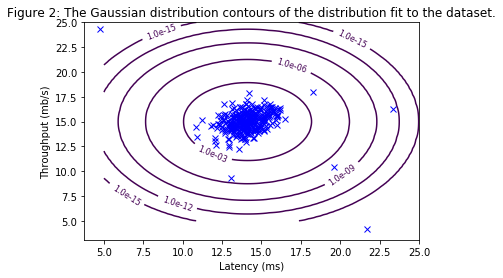

In [8]:
CS = plt.contour(xx, yy, p.reshape(xx.shape),
                 levels=np.logspace(-15, 0, 6))
plt.clabel(CS, inline=1, fmt='%.1e', fontsize=8)
plt.plot(X[:,0], X[:,1], 'bx')
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.title('Figure 2: The Gaussian distribution contours of the distribution fit to the dataset.')

## 1.3 Selecting the threshold, $\epsilon$

In [9]:
pval = multivariate_gaussian(Xval, mu, sigma2)

In [10]:
def select_threshold(yval, pval):
    best_eps = None
    best_f1 = 0
    ### YOUR CODE HERE ###





    ######################
    return best_eps, best_f1

eps, f1 = select_threshold(yval, pval)
print eps, f1

8.9998526319e-05 0.875


/Users/nakano/anaconda/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/nakano/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


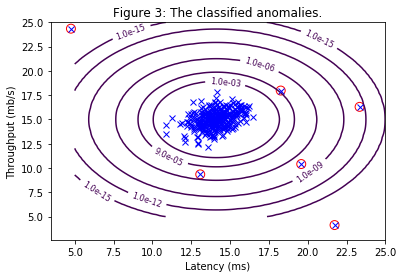

In [11]:
CS = plt.contour(xx, yy, p.reshape(xx.shape),
                 levels=sorted(np.append(np.logspace(-15, 0, 6), eps)))
plt.clabel(CS, inline=1, fmt='%.1e', fontsize=8)
plt.plot(X[:,0], X[:,1], 'bx')
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.title('Figure 3: The classified anomalies.')

anomaly = multivariate_gaussian(X, mu, sigma2) < eps
plt.scatter(X[anomaly, 0], X[anomaly, 1], s=80, facecolors='none', edgecolors='r')

## 1.4 High dimensional dataset

In [12]:
data = scipy.io.loadmat('../matlab/ex8data2.mat')
print data.keys()

['yval', '__header__', '__globals__', 'Xval', 'X', '__version__']


In [13]:
X = data['X']
Xval = data['Xval']
yval = data['yval'][:,0]
print X.shape, Xval.shape, yval.shape

(1000, 11) (100, 11) (100,)


In [14]:
mu, sigma2 = estimate_gaussian(X)
pval = multivariate_gaussian(Xval, mu, sigma2)
eps, f1 = select_threshold(yval, pval)
print eps, f1

1.3786074982e-18 0.615384615385


In [15]:
anomaly = multivariate_gaussian(X, mu, sigma2) < eps
print anomaly.sum()

117
